In [ ]:
!pip install yfinance

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import datetime
import yfinance as yf

In [ ]:
# Choose a stock ticker symbol, e.g., 'AAPL' for Apple Inc.
ticker = 'AAPL'
# Download historical data from Yahoo Finance
data = yf.download(ticker, start='2020-01-01', end=datetime.datetime.today().strftime('%Y-%m-%d'))
# Focus on 'Close' prices for simplicity
data = data[['Close']]


/tmp/ipython-input-3125686796.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2020-01-01', end=datetime.datetime.today().strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed


In [ ]:
data.head()

Price,Close
Ticker,AAPL
Date,
2020-01-02,72.468269
2020-01-03,71.763718
2020-01-06,72.335548
2020-01-07,71.995361
2020-01-08,73.153496


In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)


In [ ]:
training_data_len = int(np.ceil(len(scaled_data) * 0.8))
train_data = scaled_data[0:int(training_data_len), :]


In [ ]:
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])


In [ ]:
x_train = np.array(x_train)
y_train = np.array(y_train)

# Step 4: Build LSTM Model
model = Sequential()
# First LSTM layer with 50 units and return sequences
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))  # Dropout layer to prevent overfitting
# Second LSTM layer
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))  # Dropout layer to prevent overfitting
# Dense layer with 25 units
model.add(Dense(units=25))
# Output layer with 1 unit (the predicted price)
model.add(Dense(units=1))

# Compile the model using Adam optimizer and mean squared error as the loss function
model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Train the model with batch size of 1 and for 1 epoch (adjust epoch count for better results)
model.fit(x_train, y_train, batch_size=1, epochs=1)


1135/1135 ━━━━━━━━━━━━━━━━━━━━ 35s 25ms/step - loss: 0.0099


In [ ]:
# Take the last 60 days from the dataset for generating future predictions
last_60_days = scaled_data[-60:]
# Reshape last_60_days to fit the model input shape (1 sample, 60 timesteps, 1 feature)
x_future = last_60_days.reshape((1, last_60_days.shape[0], 1))


In [ ]:
# Create an empty list to store predictions for the next 30 days
future_predictions = []
for _ in range(30):  # Change 30 to 60 to predict for 60 days
    # Predict the next day’s closing price based on the last 60 days
    pred = model.predict(x_future)
    future_predictions.append(pred[0, 0])  # Add prediction to the list

    # Update x_future with the new prediction by removing the first value and adding the new prediction
    x_future = np.append(x_future[:, 1:, :], [[pred[0]]], axis=1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━

In [ ]:
# Convert the scaled predictions back to the original scale using inverse_transform
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))


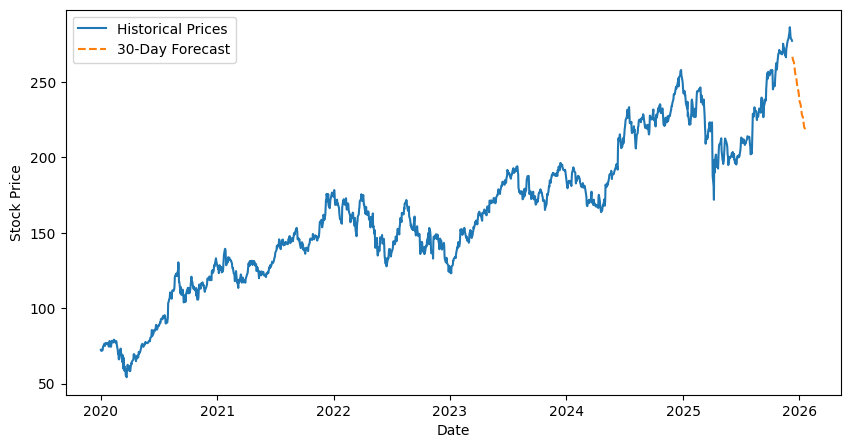

In [ ]:
# Create a DataFrame to hold the 30-day forecast with dates
forecast_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=30, freq='B')
forecast = pd.DataFrame(future_predictions, index=forecast_dates, columns=['Prediction'])

# Plot historical data and future predictions for comparison
plt.figure(figsize=(10, 5))
plt.plot(data['Close'], label='Historical Prices')
plt.plot(forecast, label='30-Day Forecast', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
